In [2]:
import pandas as pd

list1 = list([['허준호', '남자', 30, 183],
              ['이가원', '여자', 24, 162],
              ['배규민', '남자', 23, 179],
              ['고고림', '남자', 21, 182],
              ['이새봄', '여자', 28, 160],
              ['이보람', '여자', 26, 163],
              ['이루리', '여자', 24, 157],
              ['오다현', '여자', 24, 172]])
col_names = ['이름', '성별', '나이', '키']
df = pd.DataFrame(list1, columns=col_names)

In [3]:
df[df['이름'].str.contains('봄')]

,이름,성별,나이,키
4,이새봄,여자,28,160


In [4]:
df

,이름,성별,나이,키
0,허준호,남자,30,183
1,이가원,여자,24,162
2,배규민,남자,23,179
3,고고림,남자,21,182
4,이새봄,여자,28,160
5,이보람,여자,26,163
6,이루리,여자,24,157
7,오다현,여자,24,172


In [5]:
df.set_index('이름', inplace=True)
df.head(3)

,성별,나이,키
이름,,,
허준호,남자,30,183
이가원,여자,24,162
배규민,남자,23,179


In [6]:
df['보너스'] = df['나이'] * 10000
df.head(3)

,성별,나이,키,보너스
이름,,,,
허준호,남자,30,183,300000
이가원,여자,24,162,240000
배규민,남자,23,179,230000


In [7]:
df.drop('보너스', axis=1, inplace=True)
df.head(3)

,성별,나이,키
이름,,,
허준호,남자,30,183
이가원,여자,24,162
배규민,남자,23,179


In [8]:
df.reset_index(inplace=True)
df.head(3)

,이름,성별,나이,키
0,허준호,남자,30,183
1,이가원,여자,24,162
2,배규민,남자,23,179


In [9]:
rep = {'성별':{'남자':1, '여자':0}}
df2 = df.replace(rep)
df2.head(3)

,이름,성별,나이,키
0,허준호,1,30,183
1,이가원,0,24,162
2,배규민,1,23,179


In [14]:
#성별 평균 키
mean_by_gender = df.groupby(by=['성별'], as_index=False)['키'].mean()
#mean_by_gender

mean_by_gender.rename(columns={'키':'평균 키'}, inplace=True)
mean_by_gender

## '성별'을 기준으로 그룹화
## as_index=False : 그룹화한 열(성별)을 인덱스로 사용하지 않음

,성별,평균 키
0,남자,181.333333
1,여자,162.800000


In [15]:
std_by_gender = df.groupby(by=['성별'], as_index=False)['키'].std()
std_by_gender.rename(columns = {'키':'키의 표준편차'}, inplace=True)
std_by_gender

,성별,키의 표준편차
0,남자,2.081666
1,여자,5.630275


In [16]:
new_df = pd.merge(mean_by_gender, std_by_gender)
new_df

,성별,평균 키,키의 표준편차
0,남자,181.333333,2.081666
1,여자,162.800000,5.630275


In [19]:
max_by_gender = df.groupby(by=['성별'], as_index=False)['키'].max()
#mean_by_gender

max_by_gender.rename(columns={'키':'가장 큰 키'}, inplace=True)
max_by_gender

,성별,가장 큰 키
0,남자,183
1,여자,172


## Matplotlib

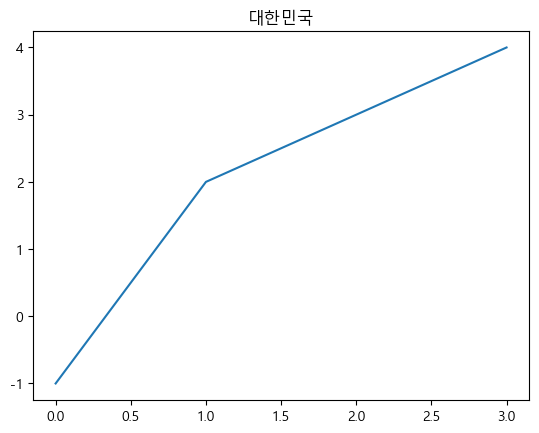

In [21]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False   # 축의 음수 기호 표시

plt.title('대한민국')
plt.plot([-1, 2, 3, 4])
plt.show()

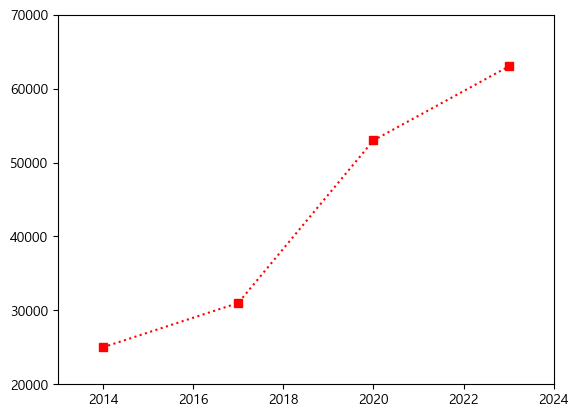

In [22]:
year = [2014, 2017, 2020, 2023]
price = [25000, 31000, 53000, 63000]
plt.plot(year, price, 'rs:')   #빨간색, 사각형 마커, 점선

plt.axis([2013, 2024, 20000, 70000]) # x축(2013~2024)과 y축(20000~70000)의 범위
plt.show()

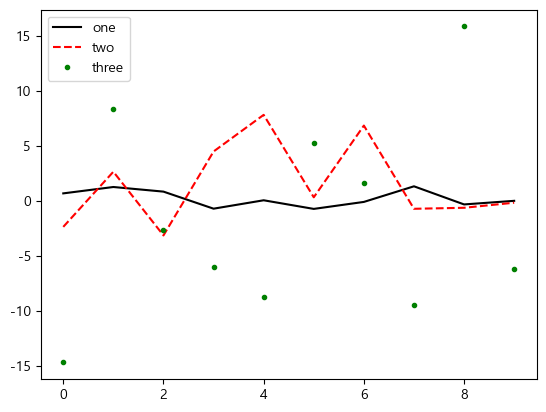

In [23]:
import numpy as np

plt.plot(np.random.randn(10), 'k', label='one')         #검은색 실선
plt.plot(np.random.randn(10)*3, 'r--', label='two')     #빨간색 파선
plt.plot(np.random.randn(10)*10, 'g.', label='three')   #선 없이 초록색 점 
plt.legend()
plt.show()

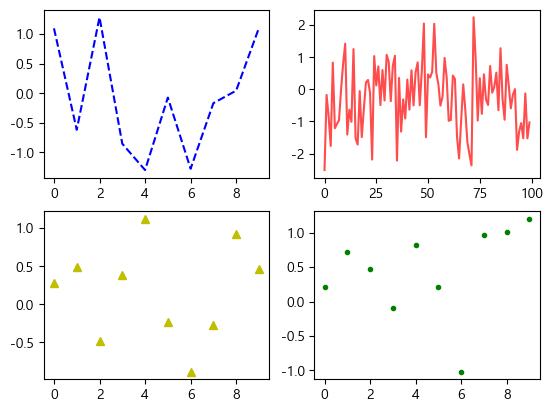

In [24]:
plt.subplot(2, 2, 1)                                # 2행 2열 중 첫 번째 그래프
plt.plot(np.random.randn(10), 'b--')
plt.subplot(2, 2, 2)                                # 2행 2열 중 두 번째 그래프
plt.plot(np.random.randn(100), 'r', alpha=0.7)
plt.subplot(2, 2, 3)                                # 2행 2열 중 세 번째 그래프
plt.plot(np.random.randn(10), 'y^')
plt.subplot(2, 2, 4)                                # 2행 2열 중 네 번째 그래프
plt.plot(np.random.randn(10), 'g.')
plt.show()

## 기온.csv 데이터 시각화

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #축의 음수 기호 표시


In [41]:
#데이터를 데이터프레임 형태로 읽어오기
df = pd.read_csv('./data/기온.csv', encoding='cp949') # utf-8 
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542
3,108,서울,2022-01-04,-2.5,-5.6,2400.0,1.0,1445
4,108,서울,2022-01-05,-2.8,-7.8,634.0,1.9,1518
...,...,...,...,...,...,...,...,...
360,108,서울,2022-12-27,-2.6,-7.3,720.0,3.3,1515
361,108,서울,2022-12-28,-3.3,-6.0,2355.0,0.1,1453
362,108,서울,2022-12-29,-2.9,-7.8,728.0,2.1,1522
363,108,서울,2022-12-30,-1.8,-4.4,2355.0,2.3,1354


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       364 non-null    float64
 5   최저기온 시각(hhmi)  364 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


In [43]:
df2 = df.fillna(method='ffill') # 'forward fill', 누락된 값을 이전 값으로 채움
                                # bfill : 누락된 값을 뒤쪽 값으로 채움
df2.info()
df2.to_csv("./data/기온_2.csv", encoding='cp949')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


PermissionError: [Errno 13] Permission denied: './data/기온_2.csv'

In [44]:
df2.rename(columns={'최저기온(°C)':'min_temp'}, inplace=True)
df2.rename(columns={'평균기온(°C)':'avg_temp'}, inplace=True)
df2.rename(columns={'최고기온(°C)':'max_temp'}, inplace=True)
df2.head(3)

,지점,지점명,일시,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542


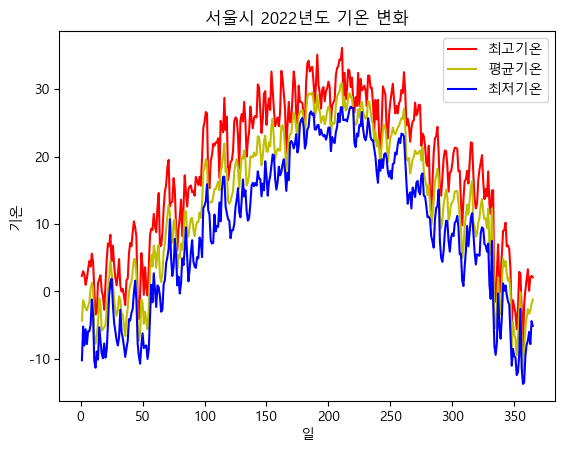

In [45]:
plt.title('서울시 2022년도 기온 변화')
plt.plot(range(1,len(df2)+1), df2['max_temp'], label='최고기온', c='r')
plt.plot(range(1,len(df2)+1), df2['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,len(df2)+1), df2['min_temp'], label='최저기온', c='b')
plt.xlabel('일')
plt.ylabel('기온')
plt.legend()
plt.show()

In [46]:
df2['일시'] = pd.to_datetime(df2['일시'], format='%Y-%m-%d')
df2['일시']

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
360   2022-12-27
361   2022-12-28
362   2022-12-29
363   2022-12-30
364   2022-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [50]:
df3_mar = df2[df2['일시'].dt.month==3]
df3_mar

,지점,지점명,일시,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
59,108,서울,2022-03-01,5.8,0.3,2355.0,9.7,1616
60,108,서울,2022-03-02,3.5,-2.3,611.0,8.8,1256
61,108,서울,2022-03-03,5.8,0.9,720.0,12.4,1413
62,108,서울,2022-03-04,6.9,0.6,652.0,14.6,1338
63,108,서울,2022-03-05,2.3,-0.7,2341.0,6.7,1600
64,108,서울,2022-03-06,1.4,-3.0,629.0,6.8,1603
65,108,서울,2022-03-07,2.8,-2.7,703.0,8.7,1505
66,108,서울,2022-03-08,6.0,1.1,307.0,12.3,1455
67,108,서울,2022-03-09,7.1,1.7,706.0,14.8,1520
68,108,서울,2022-03-10,9.3,4.2,658.0,15.8,1534


In [48]:
df3 = df2.set_index('일시')
df3.head(3)

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2022-01-01,108,서울,-4.3,-10.2,710.0,2.3,1544
2022-01-02,108,서울,-1.3,-5.2,2356.0,3.0,1551
2022-01-03,108,서울,-1.9,-8.0,714.0,2.5,1542


In [35]:
df_Mar = df3[pd.DatetimeIndex(df3.index).month == 3]  # 월(month)이 '3'인 행만 추출
df_Mar

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2022-03-01,108,서울,5.8,0.3,2355.0,9.7,1616
2022-03-02,108,서울,3.5,-2.3,611.0,8.8,1256
2022-03-03,108,서울,5.8,0.9,720.0,12.4,1413
2022-03-04,108,서울,6.9,0.6,652.0,14.6,1338
2022-03-05,108,서울,2.3,-0.7,2341.0,6.7,1600
2022-03-06,108,서울,1.4,-3.0,629.0,6.8,1603
2022-03-07,108,서울,2.8,-2.7,703.0,8.7,1505
2022-03-08,108,서울,6.0,1.1,307.0,12.3,1455
2022-03-09,108,서울,7.1,1.7,706.0,14.8,1520


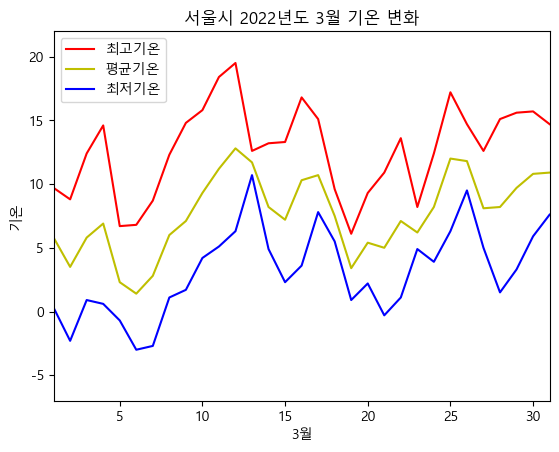

In [51]:
plt.title('서울시 2022년도 3월 기온 변화')
plt.plot(range(1,32), df_Mar['max_temp'], label='최고기온', c='r')
plt.plot(range(1,32), df_Mar['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,32), df_Mar['min_temp'], label='최저기온', c='b')

plt.xlabel('3월')
plt.ylabel('기온')
plt.xlim(1,31)
plt.ylim(-7, 22)
plt.legend()
plt.show()

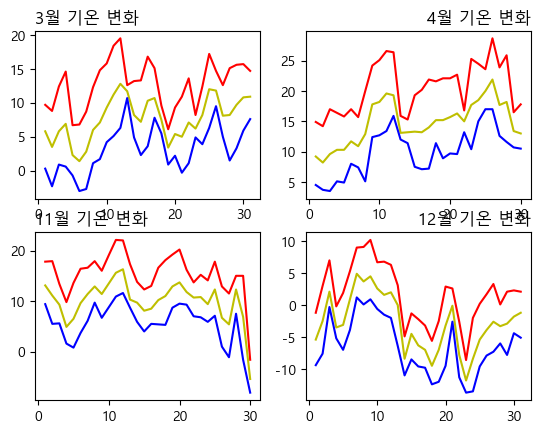

In [66]:
df_month3  = df3[pd.DatetimeIndex(df3.index).month == 3]
df_month4  = df3[pd.DatetimeIndex(df3.index).month == 4]
df_month11 = df3[pd.DatetimeIndex(df3.index).month == 11]
df_month12 = df3[pd.DatetimeIndex(df3.index).month == 12]

plt.subplot(2,2,1)
plt.title('3월 기온 변화', loc='left')
plt.plot(range(1,32), df_month3['max_temp'], c='r')
plt.plot(range(1,32), df_month3['avg_temp'], c='y')
plt.plot(range(1,32), df_month3['min_temp'], c='b')

plt.subplot(2,2,2)
plt.title('4월 기온 변화', loc='right')
plt.plot(range(1,31), df_month4['max_temp'], c='r')
plt.plot(range(1,31), df_month4['avg_temp'], c='y')
plt.plot(range(1,31), df_month4['min_temp'], c='b')

plt.subplot(2,2,3)
plt.title('11월 기온 변화', loc='left')
plt.plot(range(1,31), df_month11['max_temp'], c='r')
plt.plot(range(1,31), df_month11['avg_temp'], c='y')
plt.plot(range(1,31), df_month11['min_temp'], c='b')

plt.subplot(2,2,4)
plt.title('12월 기온 변화', loc='right')
plt.plot(range(1,32), df_month12['max_temp'], c='r')
plt.plot(range(1,32), df_month12['avg_temp'], c='y')
plt.plot(range(1,32), df_month12['min_temp'], c='b')

#plt.show()
plt.savefig('서울.png', dpi=300)

## 결측치 (NaN)

In [ ]:
import pandas as pd 

In [68]:
air = pd.read_csv("./data/20231107_nan.csv")
air

,MMDDHH,PM10,PM25,O3,NO2,CO,SO2
0,06-01-01,28.0,18.0,0.039,0.009,0.3,0.002
1,06-01-02,19.0,14.0,0.041,0.007,0.3,0.002
2,06-01-03,15.0,13.0,0.043,0.006,0.3,0.002
3,06-01-04,16.0,13.0,0.042,0.006,0.3,0.002
4,06-01-05,14.0,11.0,0.041,0.008,0.3,0.003
5,06-01-06,14.0,10.0,0.040,0.009,0.3,0.003
6,06-01-07,15.0,10.0,0.038,0.014,0.3,0.002
7,06-01-08,20.0,10.0,0.034,0.019,0.3,0.002
8,06-01-09,28.0,15.0,0.032,0.022,0.4,0.003
9,06-01-10,28.0,12.0,0.035,0.017,0.4,0.003


In [70]:
### 결측치 확인-1

air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MMDDHH  24 non-null     object 
 1   PM10    21 non-null     float64
 2   PM25    21 non-null     float64
 3   O3      22 non-null     float64
 4   NO2     22 non-null     float64
 5   CO      22 non-null     float64
 6   SO2     22 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.4+ KB


In [72]:
### 결측치 확인-2

air.isnull()

,MMDDHH,PM10,PM25,O3,NO2,CO,SO2
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [73]:
### 결측치 확인-3

air.isnull().sum()

MMDDHH    0
PM10      3
PM25      3
O3        2
NO2       2
CO        2
SO2       2
dtype: int64

#### 결측치 처리 - 결측치 제거

In [74]:
air_d = air.dropna(axis=0)

In [75]:
air_d

,MMDDHH,PM10,PM25,O3,NO2,CO,SO2
0,06-01-01,28.0,18.0,0.039,0.009,0.3,0.002
1,06-01-02,19.0,14.0,0.041,0.007,0.3,0.002
2,06-01-03,15.0,13.0,0.043,0.006,0.3,0.002
3,06-01-04,16.0,13.0,0.042,0.006,0.3,0.002
4,06-01-05,14.0,11.0,0.041,0.008,0.3,0.003
5,06-01-06,14.0,10.0,0.040,0.009,0.3,0.003
6,06-01-07,15.0,10.0,0.038,0.014,0.3,0.002
7,06-01-08,20.0,10.0,0.034,0.019,0.3,0.002
8,06-01-09,28.0,15.0,0.032,0.022,0.4,0.003
9,06-01-10,28.0,12.0,0.035,0.017,0.4,0.003


#### 결측치 처리 - 평균값으로 대체

In [76]:
# 결측치 평균대체를 위해 평균 확인
air.mean()

C:\Users\JBEDU000\AppData\Local\Temp\ipykernel_25496\3486813080.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  air.mean()


PM10    23.761905
PM25    12.666667
O3       0.039773
NO2      0.015364
CO       0.350000
SO2      0.002727
dtype: float64

In [77]:
# 평균값으로 결측치 대체
air_m = air.fillna(air.mean())
air_m

C:\Users\JBEDU000\AppData\Local\Temp\ipykernel_25496\2897468867.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  air_m = air.fillna(air.mean())


,MMDDHH,PM10,PM25,O3,NO2,CO,SO2
0,06-01-01,28.000000,18.000000,0.039000,0.009000,0.30,0.002000
1,06-01-02,19.000000,14.000000,0.041000,0.007000,0.30,0.002000
2,06-01-03,15.000000,13.000000,0.043000,0.006000,0.30,0.002000
3,06-01-04,16.000000,13.000000,0.042000,0.006000,0.30,0.002000
4,06-01-05,14.000000,11.000000,0.041000,0.008000,0.30,0.003000
5,06-01-06,14.000000,10.000000,0.040000,0.009000,0.30,0.003000
6,06-01-07,15.000000,10.000000,0.038000,0.014000,0.30,0.002000
7,06-01-08,20.000000,10.000000,0.034000,0.019000,0.30,0.002000
8,06-01-09,28.000000,15.000000,0.032000,0.022000,0.40,0.003000
9,06-01-10,28.000000,12.000000,0.035000,0.017000,0.40,0.003000


In [78]:
air_dd=air.set_index('MMDDHH')
air_dd


,PM10,PM25,O3,NO2,CO,SO2
MMDDHH,,,,,,
06-01-01,28.0,18.0,0.039,0.009,0.3,0.002
06-01-02,19.0,14.0,0.041,0.007,0.3,0.002
06-01-03,15.0,13.0,0.043,0.006,0.3,0.002
06-01-04,16.0,13.0,0.042,0.006,0.3,0.002
06-01-05,14.0,11.0,0.041,0.008,0.3,0.003
06-01-06,14.0,10.0,0.040,0.009,0.3,0.003
06-01-07,15.0,10.0,0.038,0.014,0.3,0.002
06-01-08,20.0,10.0,0.034,0.019,0.3,0.002
06-01-09,28.0,15.0,0.032,0.022,0.4,0.003


In [79]:
air_dd.mean()

PM10    23.761905
PM25    12.666667
O3       0.039773
NO2      0.015364
CO       0.350000
SO2      0.002727
dtype: float64

In [81]:
# 평균값으로 결측치 대체
air_m = air.fillna(air_dd.mean())
air_m

,MMDDHH,PM10,PM25,O3,NO2,CO,SO2
0,06-01-01,28.000000,18.000000,0.039000,0.009000,0.30,0.002000
1,06-01-02,19.000000,14.000000,0.041000,0.007000,0.30,0.002000
2,06-01-03,15.000000,13.000000,0.043000,0.006000,0.30,0.002000
3,06-01-04,16.000000,13.000000,0.042000,0.006000,0.30,0.002000
4,06-01-05,14.000000,11.000000,0.041000,0.008000,0.30,0.003000
5,06-01-06,14.000000,10.000000,0.040000,0.009000,0.30,0.003000
6,06-01-07,15.000000,10.000000,0.038000,0.014000,0.30,0.002000
7,06-01-08,20.000000,10.000000,0.034000,0.019000,0.30,0.002000
8,06-01-09,28.000000,15.000000,0.032000,0.022000,0.40,0.003000
9,06-01-10,28.000000,12.000000,0.035000,0.017000,0.40,0.003000


In [ ]:
# 중앙값으로 결측치 대체

In [83]:
air_dd.median()

PM10    25.0000
PM25    13.0000
O3       0.0395
NO2      0.0155
CO       0.3500
SO2      0.0030
dtype: float64

In [86]:
# 중앙값으로 결측치 대체
air_md = air.fillna(air_dd.median())
air_md

,MMDDHH,PM10,PM25,O3,NO2,CO,SO2
0,06-01-01,28.0,18.0,0.0390,0.0090,0.30,0.002
1,06-01-02,19.0,14.0,0.0410,0.0070,0.30,0.002
2,06-01-03,15.0,13.0,0.0430,0.0060,0.30,0.002
3,06-01-04,16.0,13.0,0.0420,0.0060,0.30,0.002
4,06-01-05,14.0,11.0,0.0410,0.0080,0.30,0.003
5,06-01-06,14.0,10.0,0.0400,0.0090,0.30,0.003
6,06-01-07,15.0,10.0,0.0380,0.0140,0.30,0.002
7,06-01-08,20.0,10.0,0.0340,0.0190,0.30,0.002
8,06-01-09,28.0,15.0,0.0320,0.0220,0.40,0.003
9,06-01-10,28.0,12.0,0.0350,0.0170,0.40,0.003


## 부화장의 병아리

In [87]:
import pandas as pd

#### 1. 변수 hat 에 'chick001.csv' 파일을 읽어온다.

In [91]:
hat = pd.read_csv('./data/chick001.csv')
hat

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24
5,F,28
6,G,27


#### 2. 'chick'항목의 합계와 평균, 표준편차, 중앙값, 최소값, 최대값 구하기

In [94]:
s=hat['chick'].sum() # 합계 구하기
m=hat['chick'].mean() # 평균 구하기
std=hat['chick'].std() # 표준편차 구하기
median=hat['chick'].median() # 중앙값 구하기
min1=hat['chick'].min() # 최소값 구하기
max1=hat['chick'].max() # 최대값 구하기

#### 3. chick 열을 기준으로 오름차순 정렬

In [ ]:
hat.sort_values(by=['chick'], ascending=True)

#### 4. 막대 그래프 그리기
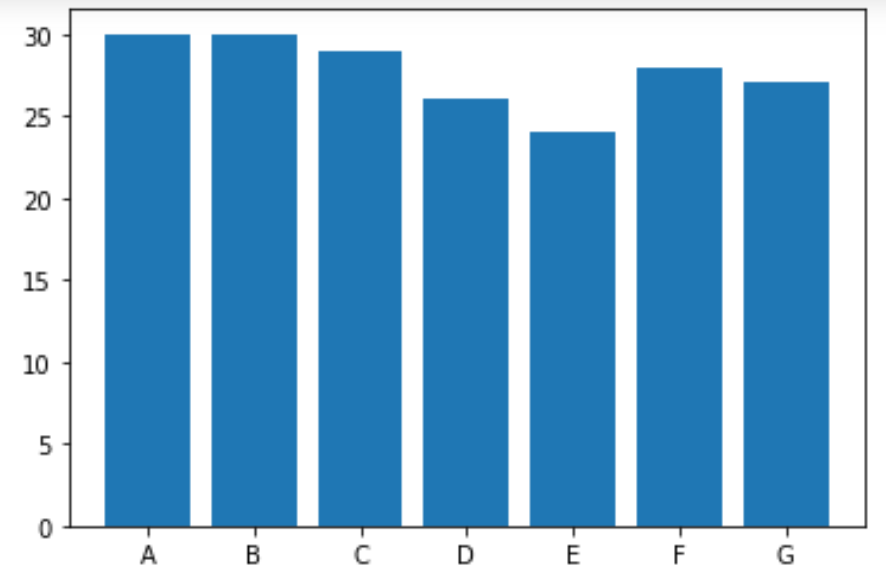

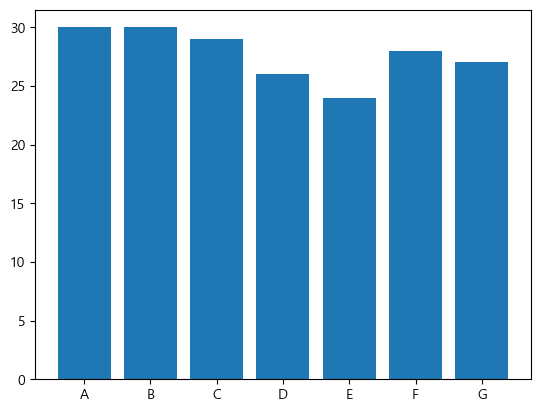

In [96]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # 축의 음수 기호 표시

plt.bar(hat['hatchery'], hat['chick'])
plt.show()

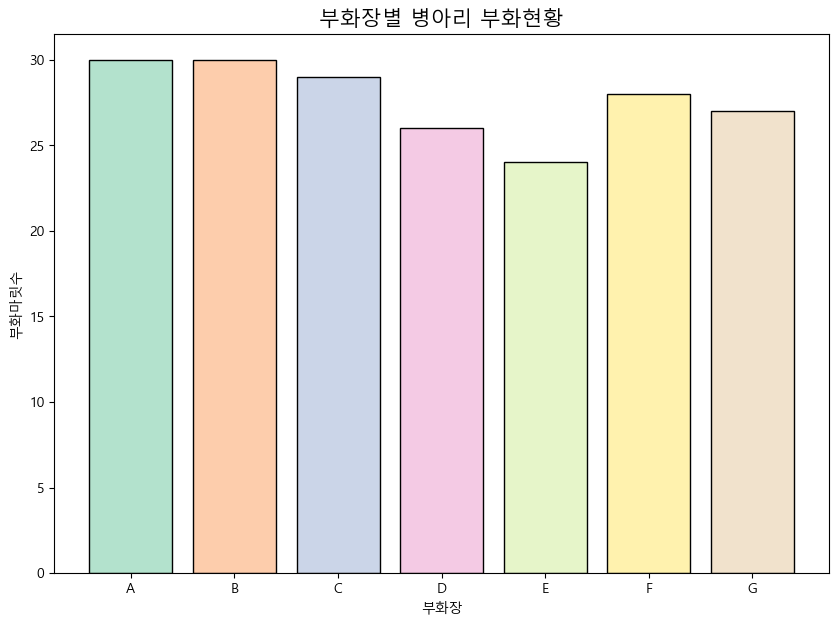

In [99]:
import seaborn as sns
col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10, 7))
plt.bar(hat['hatchery'], hat['chick'], color = col7, edgecolor = 'black')
plt.title('부화장별 병아리 부화현황', fontsize=15)
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

In [100]:
# 텍스트 추가 사용자 정의 함수 만들기
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.5,y[i], ha = 'center')

In [ ]:
# 막대 위에 텍스트 추가하기
col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10, 7))
plt.bar(hat['hatchery'], hat['chick'], color = col7, edgecolor = 'black')
addtext(hat['hatchery'], hat['chick']) # 텍스트 표시 사용자 정의 함수 추가
plt.title('부화장별 병아리 부화현황', fontsize =17)
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()